In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('merged_data1.csv',encoding = 'utf8',sep=';')
X = df[['M_C', 'M_A', 'IS_SYM', 'P', 'T']].values
y = df[['Rho']].values

In [3]:
'''Przygotowanie danych - podzielenie danych na zbiór trenujacy i testowy'''

X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.4, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print('Test shapes')
print(X_test.shape)
print(y_test.shape)

(1912, 5)
(1912, 1)
Test shapes
(1275, 5)
(1275, 1)


In [4]:
# Skalowanie cech dla lepszej wydajności modelu lasu losowego
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [6]:
# Tworzenie i trenowanie modelu Lasu Losowego
random_forest_model = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [7]:
y_test_rf = random_forest_model.predict(X_test)

In [8]:
y_test_rf

array([1308.22 , 1267.21 , 1489.783, ..., 1417.862, 1314.151, 1184.462])

In [9]:
r2 = r2_score(y_test, y_test_rf)
print(f"Współczynnik determinacji R^2: {r2}")
mse = mean_squared_error(y_test, y_test_rf)
print(f"Błąd średniokwadratowy MSE: {mse}")

Współczynnik determinacji R^2: 0.9978157511132048
Błąd średniokwadratowy MSE: 41.73688288759697


In [10]:
###Metryki błędu dla zbioru treningowego
y_train_rf =random_forest_model.predict(X_train)
r2_train = r2_score(y_train, y_train_rf)
print(f"Współczynnik determinacji R^2: {r2_train}")
mse_train = mean_squared_error(y_train, y_train_rf)
print(f"Błąd średniokwadratowy MSE: {mse_train}")

Współczynnik determinacji R^2: 0.9995735834578123
Błąd średniokwadratowy MSE: 8.369395115441385


# Walidacja krzyżowa

In [11]:
from sklearn.model_selection import cross_val_score

In [15]:
# Przeprowadź walidację krzyżową z 5 foldami i oblicz R^2 jakość modelu
cv_scores = cross_val_score(random_forest_model, X_test, y_test, cv=25, scoring='r2')

In [16]:
# Oblicz średnią wartość R^2 po wszystkich foldach
mean_r2 = cv_scores.mean()

In [17]:
print("Średni R^2 po walidacji krzyżowej:", mean_r2)

Średni R^2 po walidacji krzyżowej: 0.9946840940090229


# Wykresy R2

In [15]:
test_predictions_rf = pd.Series(y_test_rf.reshape(1275,))
pred_df = pd.DataFrame(y_test,columns = ['Test TRUE Y'])
pred_df = pd.concat([pred_df,test_predictions_rf],axis = 1)
pred_df.columns = ['Test true y', 'Pred']

In [16]:
train_predictions_rf = pd.Series(y_train_rf.reshape(1912,))
train_df = pd.DataFrame(y_train,columns = ['Test TRUE Y'])
train_df = pd.concat([train_df,train_predictions_rf],axis = 1)
train_df.columns = ['Test true y', 'Pred']

<Axes: xlabel='Test true y', ylabel='Pred'>

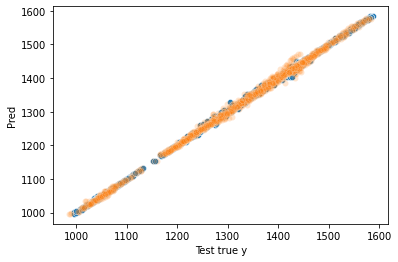

In [17]:
sns.scatterplot(x = 'Test true y', y = 'Pred', data = train_df)
sns.scatterplot(x = 'Test true y', y = 'Pred', data = pred_df, alpha = 0.2)

In [18]:
train_df

,Test true y,Pred
0,1484.17,1483.6880
1,1251.80,1249.6600
2,1414.30,1417.4440
3,1434.54,1450.6330
4,1453.62,1453.9994
...,...,...
1907,1325.50,1324.5600
1908,1023.86,1026.0210
1909,1214.92,1215.2430
1910,1513.35,1512.4160


In [19]:
pred_df

,Test true y,Pred
0,1310.90,1308.220000
1,1266.10,1267.210000
2,1492.27,1489.783000
3,1190.69,1192.785000
4,1061.93,1063.534000
...,...,...
1270,1379.05,1369.319675
1271,1057.40,1054.455000
1272,1421.72,1417.862000
1273,1317.90,1314.151000


#  Zapis zbioru testowego i treningowego

In [20]:
import os
directory_path = 'D:/PhD/ML/RF/Rho'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
# train_df.to_csv(os.path.join(directory_path, 'train_set_RF.csv'), sep=';', encoding='utf-8')
# pred_df.to_csv(os.path.join(directory_path, 'test_set_RF.csv'), sep=';', encoding='utf-8') 

#  Schemat obliczeń dla konkretnej cieczy jonowej

In [20]:
def predictions3(MC,MA,SYM,P,T):
    res = []
    for j in T:
        for i in P:
            new_geom = [[MC,MA,SYM,i,j]]
            new_geom = scaler.transform(new_geom)
            res.append(random_forest_model.predict(new_geom))
            #print(model.predict(new_geom))
    return res

In [34]:
nazwa = 'C4Mim_C1SO4'
Mcat = 139.29
Man = 111.097

P = [0.1,2.5,5,10,15,20,25,30,35]
T = [283.15,285.65,288.15,290.65,293.15,295.65,298.15,300.65,303.15,305.65,308.15,310.65,313.15,315.65,318.15,320.65,323.15,325.65,328.15,330.65,333.15,335.65,338.15,340.65,343.15,345.65,348.15,350.65,353.15]
result = predictions3(Mcat,Man,0,P,T);

In [35]:
res_flat = np.array(result).flatten()  # przekształcenie do jednowymiarowej tablicy numpy
res_numerical = [val.item() for val in res_flat]  # wyodrębnienie wartości liczbowych
# for i in res_numerical:
#     print(i);

In [36]:
import os
directory_path = 'D:/PhD/ML/RF/Rho/'
directory_path + nazwa
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
tablica_danych = np.array(res_numerical).reshape(len(T), len(P))
dane = pd.DataFrame(tablica_danych)
dane = dane.T
dane.to_excel(directory_path+nazwa+'_Rho_DATA_RF.xlsx', index=False)
raw = pd.DataFrame(res_numerical) ###Zapis wektora danych w postaci kolumny surowych danych
raw.to_excel(directory_path+nazwa+'_Rho_RAW_RF.xlsx', index=False)